Total anomalies detected: 16
     Feature_1  Feature_2  Anomaly
56    0.060230   2.463242     True
89   -0.264657   2.720169     True
104   0.515048   3.852731     True
110   2.314659  -1.867265     True
126   2.122156   1.032465     True
131  -3.241267  -1.024388     True
142   2.133033  -1.952088     True
173  -1.448084  -1.407464     True
210   2.060748   1.755341     True
215  -1.183259  -2.039232     True
239   3.078881   1.119575     True
250   0.926178   1.909417     True
272  -2.471645  -0.796895     True
291   0.632782   2.270693     True
304   3.221280   6.496044     True
307   7.445752   5.129221     True


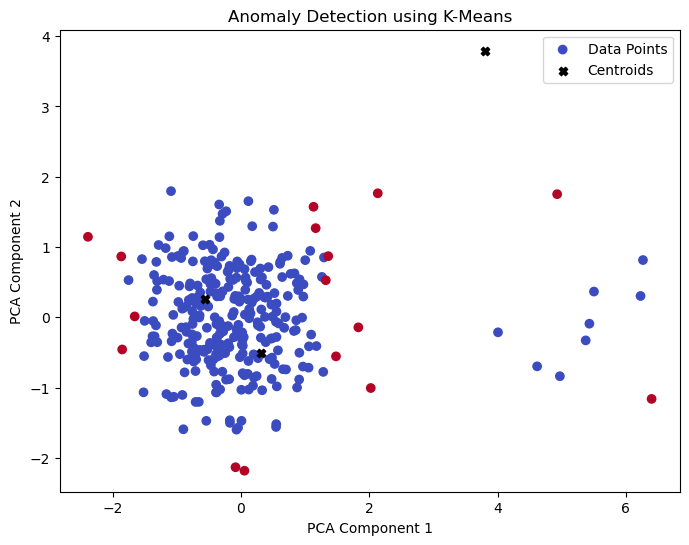

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(300, 2))  # Normal data
anomalies = np.random.normal(loc=5, scale=1, size=(10, 2))  # Anomalous data
data = np.vstack((normal_data, anomalies))

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Feature_1", "Feature_2"])

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Compute distances to the closest cluster centroid
distances = np.min(kmeans.transform(X_scaled), axis=1)

# Identify anomalies (Top 5% of farthest points)
threshold = np.percentile(distances, 95)
df["Anomaly"] = distances > threshold

# Step 4: Evaluate and visualize anomalies
print("Total anomalies detected:", df["Anomaly"].sum())
print(df[df["Anomaly"] == True])  # List of detected anomalies

# PCA for visualization (if features > 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Anomaly"], cmap="coolwarm", label="Data Points")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black", marker="X", label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Anomaly Detection using K-Means")
plt.legend()
plt.show()
